# Algo de estadística

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Ferorti/escuela2021/blob/main/clases/clase_11_stats.ipynb)

## Secciones
- Estadísticos descriptivos en pandas
- Regresión lineal
- Test de hipótesis

## Paquetes para estadística en python

- Pandas : Estadística descriptiva básica
- pydataset : datasets comunes en analisis de datos
- statmodels : statistical models, hypothesis tests, and data exploration
- scikit_learn : Classification, Regression, Clustering, Dimensionality reduction, Model selection
- scipy : Herramientas bases de computación científica

## Estadísticos descriptivos en pandas

In [6]:
import numpy as np
import statsmodels.api as sm

# !pip install pydataset
# Hay que instalar pydataset en Colab
from pydataset import data

In [7]:
iris = data('iris', show_doc=True)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

In [8]:
iris = data('iris')

In [12]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


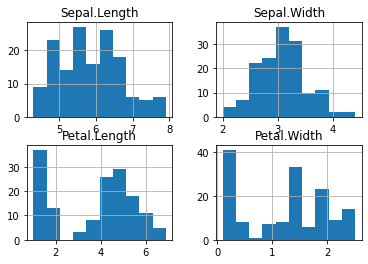

In [48]:
h = iris.hist()

In [38]:
iris.describe()
#iris.groupby(by='Species').describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
iris.mean()
# iris.std()
# iris.mean()
# iris.quantile(0.75)

Sepal.Length    6.4
Sepal.Width     3.3
Petal.Length    5.1
Petal.Width     1.8
Name: 0.75, dtype: float64

In [43]:
iris.median()

Sepal.Length    5.80
Sepal.Width     3.00
Petal.Length    4.35
Petal.Width     1.30
dtype: float64

In [44]:
# Desviación media absoluta
iris.mad()

Sepal.Length    0.687556
Sepal.Width     0.336782
Petal.Length    1.562747
Petal.Width     0.658133
dtype: float64

In [45]:
# Varianza
iris.var()

Sepal.Length    0.685694
Sepal.Width     0.189979
Petal.Length    3.116278
Petal.Width     0.581006
dtype: float64

In [46]:
# Covarianza
iris.cov()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.685694,-0.042434,1.274315,0.516271
Sepal.Width,-0.042434,0.189979,-0.329656,-0.121639
Petal.Length,1.274315,-0.329656,3.116278,1.295609
Petal.Width,0.516271,-0.121639,1.295609,0.581006


In [50]:
# Skew, cuan asimétrica es la distribución
iris.groupby(by='Species').skew()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,0.120087,0.041167,0.106394,1.253861
versicolor,0.105378,-0.362845,-0.606508,-0.031180
virginica,0.118015,0.365949,0.549445,-0.129477


<AxesSubplot:>

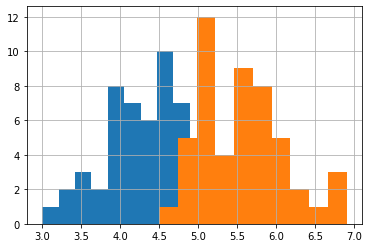

In [57]:
iris.loc[iris.Species=='versicolor', 'Petal.Length'].hist()
iris.loc[iris.Species=='virginica', 'Petal.Length'].hist()

In [64]:
# Kurtosis, que tan concentrada es una distribución
iris.kurtosis()

Sepal.Length   -0.552064
Sepal.Width     0.228249
Petal.Length   -1.402103
Petal.Width    -1.340604
dtype: float64

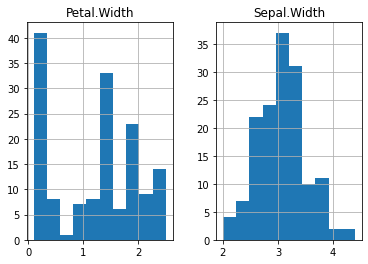

In [211]:
h = iris[['Petal.Width', 'Sepal.Width']].hist()

## Regresión lineal

Pandas no ofrece la funcionalidad de hacer regresiones lineales.
Por lo que vamos a necesitar otro paquete: scikit_learn ( que ofrece el módulo sklearn)

In [70]:
# Para instalar :
# pip install scikit_learn
import sklearn

Coef det. (r2): 0.9271098389904927
Intercept: -0.3630755213190291
Coeficiente(pendiente): [0.41575542]


<AxesSubplot:xlabel='Petal.Length', ylabel='Petal.Width'>

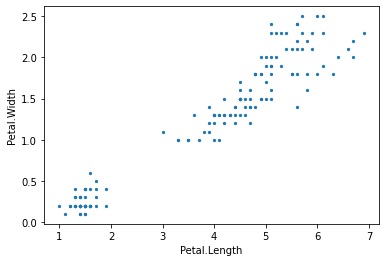

In [96]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

model = LinearRegression()

x = iris['Petal.Length'].values.reshape((-1,1))
y = iris['Petal.Width']
result = model.fit(
    x, y
)
# Coeff de determinacion
print('Coef det. (r2):', result.score(x, y))
print('Intercept:', result.intercept_)
print('Coeficiente(pendiente):', result.coef_)

iris.plot(
    x='Petal.Length',
    y='Petal.Width',
    marker='.',
    kind='scatter'
)



In [101]:
y_pred = result.predict([[2.5]])

print("El valor esperado para 2.5 es ", y_pred)

El valor esperado para 2.5 es  [0.67631302]


## Test de hipótesis

In [201]:
def make_data():
    data = np.random.normal(1000, 300, 1000)
    data[data<0] = 0
    return data

gene_exp = pd.DataFrame.from_dict({
    'Name': [ "Gene_"+str(x+1) for x in range(1000)],
    'ctrl1': make_data(),
    'ctrl2': make_data(),
    'ctrl3': make_data(),
    'ctrl4': make_data(),
    'trat1': make_data(),
    'trat2': make_data(),
    'trat3': make_data(),
    'trat4': make_data(),
})


In [202]:
gene_exp.iloc[0, [5,6,7,8]] = gene_exp.iloc[0, [5,6,7,8]] + 3000

In [203]:
gene_exp.head()

,Name,ctrl1,ctrl2,ctrl3,ctrl4,trat1,trat2,trat3,trat4
0,Gene_1,950.605223,1102.690467,1043.520815,929.405828,4044.548585,4221.849368,3937.279466,3804.125554
1,Gene_2,966.732429,966.667207,450.949733,772.893016,687.238177,1197.983041,1571.572167,853.711499
2,Gene_3,1093.421358,934.406841,846.078810,683.627750,1159.290426,812.501193,842.991554,1115.094065
3,Gene_4,962.515676,1270.271818,1399.269671,1370.848733,489.546846,928.069851,905.003569,563.532857
4,Gene_5,971.910685,1108.767504,914.886344,1083.373884,684.882164,988.328574,313.654837,1122.745316


In [206]:
from scipy import stats
def compute_t_test(row):
    ctrl = row[1:5]
    trat = row[5:10]
    t, pval = stats.ttest_ind(ctrl, trat, equal_var = True)
    return pval

pavlues = gene_exp.apply(compute_t_test, axis=1)

gene_exp['pval'] = pvalues


In [207]:
gene_exp.head()



,Name,ctrl1,ctrl2,ctrl3,ctrl4,trat1,trat2,trat3,trat4,pval
0,Gene_1,950.605223,1102.690467,1043.520815,929.405828,4044.548585,4221.849368,3937.279466,3804.125554,0.000006
1,Gene_2,966.732429,966.667207,450.949733,772.893016,687.238177,1197.983041,1571.572167,853.711499,0.131220
2,Gene_3,1093.421358,934.406841,846.078810,683.627750,1159.290426,812.501193,842.991554,1115.094065,0.381534
3,Gene_4,962.515676,1270.271818,1399.269671,1370.848733,489.546846,928.069851,905.003569,563.532857,0.258850
4,Gene_5,971.910685,1108.767504,914.886344,1083.373884,684.882164,988.328574,313.654837,1122.745316,0.545667


In [208]:
(gene_exp['pval'] < 0.05).value_counts()

False    954
True      46
Name: pval, dtype: int64

In [209]:
import statsmodels
tp, fdr, _, _ = statsmodels.stats.multitest.multipletests(pvalues)
gene_exp['fdr'] = fdr

In [210]:
gene_exp[gene_exp.fdr<0.05]

,Name,ctrl1,ctrl2,ctrl3,ctrl4,trat1,trat2,trat3,trat4,pval,fdr
0,Gene_1,950.605223,1102.690467,1043.520815,929.405828,4044.548585,4221.849368,3937.279466,3804.125554,0.000006,0.006406
